In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('seaborn-notebook')
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import src.scrubbing as scrubbing
import src.evaluation as evalu
from src.roc import plot_roc

/home/soong/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df = pd.read_csv('data/Restaurant_Scores_-_LIVES_Standard.csv')

In [4]:
df7 = scrubbing.scrub_all(df)

/home/soong/galv/capstone/SFeaters/src/scrubbing.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_viol['short_violation_id'] = L_vid
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['inspect_date'] = pd.to_datetime(df.inspection_date)
/home/soong/galv/capstone/SFeaters/src/scrubbing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:

In [50]:
df7.to_pickle('data/sf_inspection.pkl')

In [54]:
df8 = pd.read_pickle('data/sf_inspection.pkl')

## Find out the total number of restaurants in the SF health inspection report

In [5]:
df7.head(1)

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,94129,94130,94131,94132,94133,94134,94143,94158,95105,p10_36
0,1757,Dar Bar Pakistani/Indian Cusine,1412 Polk St,San Francisco,CA,94109,37.7898,-122.42,"(37.789784, -122.420455)",NaN,...,0,0,0,0,0,0,0,0,0,11


In [6]:
f1034 = df7['business_address'].unique()

In [7]:
len(list(f1034))

4358

## Import clean data from pickle

In [2]:
df8 = pd.read_pickle('data/sf_inspection2.pkl')

## Modeling: logistic regression and gradient boosting

In [19]:
y = df8['y_label']
X = df8[['p7_9', 'p10_12', 'p13_18', 'p19_24', 'p25_36', '94013', '94014', '94080', '94101', '94102', '94103', '94104',
       '94105', '94107', '94108', '94109', '94110', '94111', '94112', '94114',
       '94115', '94116', '94117', '94118', '94120', '94121', '94122', '94123',
       '94124', '94127', '94129', '94130', '94131', '94132', '94133', '94134',
       '94143', '94158']]

In [20]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

### Let's stash X_test and y_test away for only test set purpose. Split X_train and y_train again for train and validation.

In [21]:
X_train, X_validation, y_train, y_validation = train_test_split(X_tr, y_tr, test_size=0.25, random_state=28)

In [22]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
log_model.coef_

array([[-0.40518605, -0.24633135,  0.07590432,  0.18925423,  0.11127685,
         0.        ,  0.08676416,  0.        ,  0.        , -0.3891833 ,
         0.45053804,  1.14957605, -0.11758996, -0.73413507, -0.06419537,
         1.13403706,  1.37134309, -0.20583216, -0.01628042,  0.75256999,
        -0.79661287,  0.62498681, -0.0849984 ,  0.00966387, -0.30427112,
        -0.07869748,  0.55801264,  1.80633784, -0.39766452,  0.49712313,
        -0.29723071, -0.31138788, -0.04337178,  0.537783  ,  0.4749317 ,
         0.40737264,  0.        , -0.9495466 ]])

In [24]:
log_model.intercept_

array([-0.78708681])

In [25]:
log_model.score(X_validation, y_validation)

0.6895424836601307

# Gradient Boosting Model

In [26]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))

Learning rate:  0.05
Accuracy score (training): 0.575
Accuracy score (validation): 0.614
Learning rate:  0.1
Accuracy score (training): 0.599
Accuracy score (validation): 0.623
Learning rate:  0.25
Accuracy score (training): 0.666
Accuracy score (validation): 0.675
Learning rate:  0.5
Accuracy score (training): 0.697
Accuracy score (validation): 0.698
Learning rate:  0.75
Accuracy score (training): 0.697
Accuracy score (validation): 0.693
Learning rate:  1
Accuracy score (training): 0.692
Accuracy score (validation): 0.690


In [27]:
# Let's use learning rate of 0.75
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation, y_validation)))
# The "validation" here is a correct term. It is not a "test" set.

Accuracy score (training): 0.697
Accuracy score (validation): 0.693


### Cofusion matrix

In [28]:
y_predictions = gb.predict(X_test)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predictions).ravel()

In [30]:
print("True Negative: {}".format(tn))
print("True Positive: {}".format(tp))
print("False Negative: {}".format(fn))
print("False Positive: {}".format(fp))

True Negative: 540
True Positive: 314
False Negative: 230
False Positive: 141


In [31]:
#y = int(y.values == True)
ay = y[:]
ay = 1*y.values

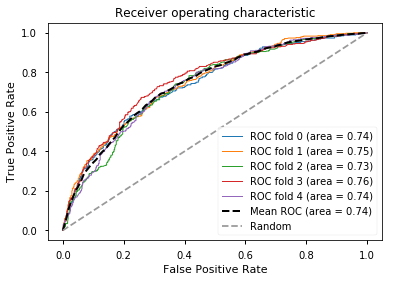

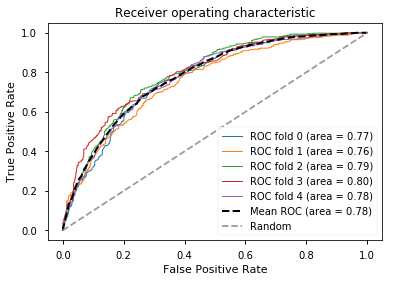


Plotting completed.


In [32]:
plot_roc(X, ay, LogisticRegression)
plot_roc(X, ay, GradientBoostingClassifier)
# plot_roc(X, y, MultinomialNB) error
print('\nPlotting completed.')

### Plotting Methods

In [34]:
def plot_roc(y_test, X_test, model, model_name):
    AUC = roc_auc_score(y_test, gb.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, gb.predict_proba(X_test)[:,1])
    
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic {}'.format(model_name))
    plt.legend(loc="lower right");

In [35]:
def plot_profit_curve(scoring, profit_matrix, num_points=100):
    x_threshold, y_profit = scoring.profit_curve(num_points=num_points, profit_matrix=profit_matrix)
    
    fig, ax = plt.subplots()
    ax.plot(x_threshold, y_profit)
    
    ymax = max(y_profit)
    xpos = y_profit.index(ymax)
    xmax = x_threshold[xpos]
    
    text= "x={:.3f}, y={:.3f}".format(xmax, ymax)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=180,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction", arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
    #ax.set_ylim(min(y_profit), ymax*2)
    ax.set_ylim(min(y_profit), ymax*1.7)
    ax.set_xlabel('Threshold For Predicting Inspection Fail')
    ax.set_ylabel('Profit')
    ax.set_title('Profit Curve')
    plt.show()

## Profit curve

In [36]:
scoring = evalu.Scores(model=gb, X_test=X_test, y_test=y_test)
scoring.scores()

Accuracy: 0.6971428571428572
Precision 0.6901098901098901
Recall 0.5772058823529411
F1 0.6286286286286286


In [92]:
# customer, investment on facility/training, fine by the city
investment = 20  # equipment replacement and employee training
fine = 200   # penalty by the city 

false_pos = (-1)*investment
true_pos  = fine - investment
false_neg = 0
true_neg  = 0

profit_matrix = [[true_neg, false_pos],[false_neg, true_pos]]

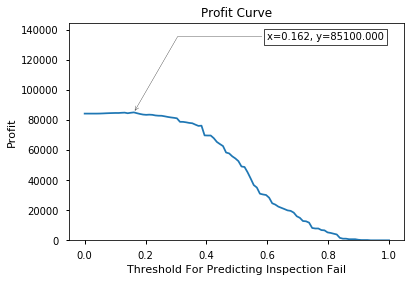

In [93]:
plot_profit_curve(scoring, profit_matrix, num_points=100)